In [2]:
import stlab
import stlabutils
import numpy as np
import pickle
import multiprocessing as mp
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['lines.linewidth'] = 2

# Give colours in hex
qubit     = '#664277'  # qubit
cavity1   = '#fa476f'  # cavity 1
cavity2   = '#c86464'  # cavity 2
coupling1 = '#68b799'  # coupling between qubit and cavity 1
coupling2 = '#7eb6a1'  # coupling between qubit and cavity 1
drive     = '#68b799'  # single-tone drive strength
driveq    = 'green'    # qubit-friendly drive tone strength
drivec    = 'cyan'     # cavity-friendly drive tone strenth
sbred     = '#c86464'  # P(e0)-P(g1), red sideband transitions
sbblue    = '#6196b3'  # P(e1)-P(g0), blue sideband transitions
hline     = 'gray'     # horizontal domain lines
colormap  = 'gist_heat'   # colormap for color plots

In [3]:
# Specify the path to your data file
folder = '/home/jovyan/steelelab/measurement_data/newBF/Wouter/Wouter_thesis_resonator_and_qubit_basic/'
file = 'C_qubit_high_probe_power_#fpump_Ppump_S21/B12_2019_12_25_20.28.14_LT142W4_5D_c_20dB-prove_20dB_pump_qubitsearch.dat'
filepath = folder + file

# Load the data
data = stlabutils.readdata.readdat(filepath)

x = np.asarray(data[0]['Frequency (Hz)'])*1e-9
y = np.linspace(0, -30, 31)
z = np.zeros([y.shape[0], x.shape[0]])
for i, line in enumerate(data):
    line['S21_lin ()'] = (line['CH2_S21_S1re ()']**2 + line['CH2_S21_S1im ()']**2)
    z[i] = np.asarray(line['S21_lin ()'])
print(data[0]['Frequency (Hz)'])

['Frequency (Hz)', 'CH2_S21_S1re ()', 'CH2_S21_S1im ()', 'CH2_S21_S1dB (dB)', 'CH2_S21_S1Ph (rad)', 'power (dBm)']
0       6.000000e+09
1       6.001000e+09
2       6.002000e+09
3       6.003000e+09
4       6.004000e+09
            ...     
996     6.996000e+09
997     6.997000e+09
998     6.998000e+09
999     6.999000e+09
1000    7.000000e+09
Name: Frequency (Hz), Length: 1001, dtype: float64


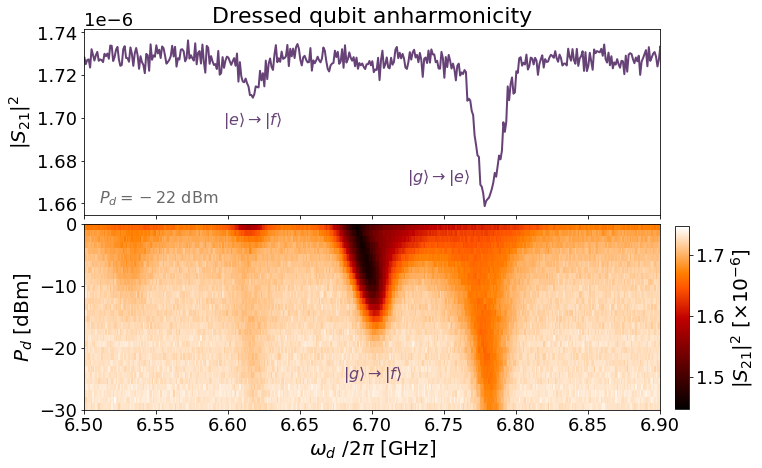

In [7]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10,7))

axes[0].plot(x, z[22], c=qubit, label="Measurement")
# axes[0].plot(x, z[-1], c=qubit, label="Measurement")
axes[0].set_xlim([6.5, 6.9])
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[0].set_ylabel("$|S_{{21}}|^2$")
axes[0].set_title("Dressed qubit anharmonicity")
axes[0].text(6.51, 1.66e-6, "$P_d = -22$ dBm", color='dimgrey')
axes[0].text(6.617, 1.697e-6, "$\\left| e \\right> \\rightarrow \\left| f \\right>$", color=qubit, horizontalalignment='center')
axes[0].text(6.768, 1.67e-6, "$\\left| g \\right> \\rightarrow \\left| e \\right>$", color=qubit, horizontalalignment='right')

cplot = axes[1].pcolor(x, y, z*1e6, cmap='gist_heat')
axes[1].set_xlabel("$\\omega_d$ $/2\\pi$ [GHz]")
axes[1].set_ylabel("$P_d$ [dBm]")
axes[1].text(6.7, -25, "$\\left| g \\right> \\rightarrow \\left| f \\right>$", color=qubit, horizontalalignment='center')

fig.subplots_adjust(left=0.07, right=0.87)
box = axes[1].get_position()
pad, width = 0.02, 0.02
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height+0.02])
fig.colorbar(cplot, cax=cax, label='$|S_{{21}}|^2$ [$\\times 10^{{-6}}$]')

fig.subplots_adjust(hspace=0.05)
plt.show()